In [92]:
!pip install sanic

You should consider upgrading via the '/Users/shadow/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [6]:
from matplotlib import pyplot as plt
import cv2
import paddlehub as hub
import numpy as np 

# 模型加载
# use_gpu：是否使用GPU进行预测
model = hub.Module(name='MiDaS_Small', use_gpu=False)

/Users/shadow/opt/anaconda3/lib/python3.7/site-packages/pip/_vendor/packaging/version.py:130: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  DeprecationWarning,
/Users/shadow/opt/anaconda3/lib/python3.7/site-packages/pip/_vendor/packaging/version.py:130: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  DeprecationWarning,


In [7]:
# 模型预测
def predict(images):
    return model.depth_estimation(images=images)

In [8]:
def get_depth_map(depth, bits=1):
    depth_min = depth.min()
    depth_max = depth.max()

    max_val = (2**(8 * bits)) - 1

    if depth_max - depth_min > np.finfo("float").eps:
        out = max_val * (depth - depth_min) / (depth_max - depth_min)
    else:
        out = np.zeros(depth.shape, dtype=depth.type)
    if bits == 1:
        return out.astype("uint8")
    elif bits == 2:
        return out.astype("uint16")

In [9]:
def show(_im):
    plt.figure(figsize=(4,4))
    _img = _im[:,:,::-1] # 必须为 ::-1
    plt.imshow(_img)

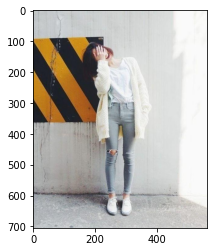

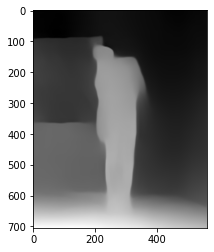

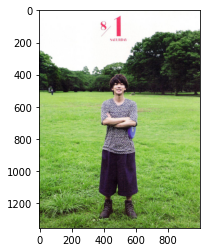

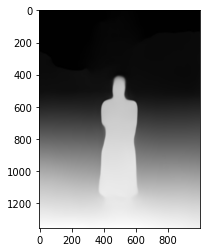

In [12]:
for fp in ['test.jpeg','t2.jpeg']:
    im=cv2.imread(fp)
    show(im)
    img=predict([im])[0]
    img=get_depth_map(img)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
#     cv2.imwrite('depth_estimation.png',img)
    show(img)

In [4]:
!python main.py

/Users/shadow/opt/anaconda3/lib/python3.7/site-packages/pip/_vendor/packaging/version.py:130: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  DeprecationWarning,
/Users/shadow/opt/anaconda3/lib/python3.7/site-packages/pip/_vendor/packaging/version.py:130: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  DeprecationWarning,
I0309 12:11:52.601193 114978240 analysis_predictor.cc:155] Profiler is deactivated, and no profiling report will be generated.
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running 